In [65]:
#Import Dependencies
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import mstats
import matplotlib.pyplot as plt
import matplotlib
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [66]:
#setting jupyter notebook to display all columns
pd.options.display.max_columns = None
#read in csv
finan_csv_path = "Images & Resources/raw_data_nonresponse_empty.csv"
financials_df = pd.read_csv(finan_csv_path, engine = 'python')
financials_df.head()

,dummy_id,final_weight,age,statereside,maritalstatus,education,laborstatus,hhincome,racethn5,q009,q040,q041,q042,q042_other,q042s1,q042s2,q042s3,q042s4,q042s5,q042s6,q042s7,q042s8,q042s9,q044,q045,q046,q047,q048,q049,q051,q052,q053,q053_other,q054,q055,q056,q057,q058,q059,q060,q061,q062,q063,q064,q066,q067,q068,q116,q117a
0,1.0,4,53.0,1 Alabama,6 Never married,6 10th grade,8 Mixed,"13 60,000 to 74,",2.0,4 Very little,3 Did not receive and do not expect a tax refund,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3 1-2 months,3 Somewhat confident,1 Yes,3 I dont know,3 I dont know,2 No,2 No,3 I dont know,2 No,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,3 Not currently saving,NaN,NaN,NaN,NaN,NaN,NaN,2 No,2 No
1,2.0,0,67.0,1 Alabama,1 Married (spouse lives with me),9 High school graduate or GED,5 Retired,"8 25,000 to 29,",1.0,1 Completely,3 Did not receive and do not expect a tax refund,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4 1-3 weeks,4 Slightly confident,1 Yes,2 No,2 No,2 No,2 No,2 No,2 No,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,2 Saving whenever possible,NaN,NaN,NaN,NaN,NaN,NaN,2 No,2 No
2,3.0,1,37.0,1 Alabama,1 Married (spouse lives with me),9 High school graduate or GED,1 Currently working,"6 15,000 to 19,",1.0,3 Somewhat,1 Received a tax refund,"4 Did something else with it, please specify: ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5 Less than 1 week,5 Not at all confident,1 Yes,2 No,2 No,2 No,2 No,1 Yes,2 No,NaN,185.0,NaN,NaN,NaN,NaN,260.0,NaN,3 Not currently saving,NaN,NaN,NaN,NaN,2 Saving whenever possible,NaN,2 No,2 No
3,4.0,2,36.0,1 Alabama,6 Never married,13 Bachelor's degree,1 Currently working,"12 50,000 to 59,",2.0,2 Very well,1 Received a tax refund,1 Spent all of the tax refund,2-1-3-7,NaN,1 Yes,1 Yes,1 Yes,0 No,0 No,0 No,1 Yes,0 No,0 No,5 Less than 1 week,4 Slightly confident,1 Yes,1 Yes,1 Yes,2 No,2 No,2 No,2 No,NaN,1.0,1.0,3300.0,NaN,NaN,NaN,NaN,3 Not currently saving,2 Saving whenever possible,1 Saving regularly,NaN,NaN,NaN,NaN,2 No,2 No
4,5.0,0,47.0,1 Alabama,1 Married (spouse lives with me),14 Master's degree,1 Currently working,"15 100,000 to 149,",1.0,3 Somewhat,1 Received a tax refund,"2 Saved some of it, spent some of it",1-Feb,NaN,1 Yes,1 Yes,0 No,0 No,0 No,0 No,0 No,0 No,0 No,2 3-5 months,2 Moderately confident,1 Yes,1 Yes,2 No,1 Yes,1 Yes,1 Yes,1 Yes,land,2000.0,10000.0,NaN,65000.0,40000.0,500.0,70000.0,2 Saving whenever possible,2 Saving whenever possible,NaN,1 Saving regularly,2 Saving whenever possible,2 Saving whenever possible,2 Saving whenever possible,1 Yes,1 Yes


In [67]:
#split strings so that only numeric response values are left in columns
financials_df['statereside']= financials_df['statereside'].str.split(' ').str[0]
financials_df['maritalstatus']= financials_df['maritalstatus'].str.split(' ').str[0]
financials_df['education']= financials_df['education'].str.split(' ').str[0]
financials_df['laborstatus']= financials_df['laborstatus'].str.split(' ').str[0]
financials_df['hhincome']= financials_df['hhincome'].str.split(' ').str[0]
financials_df['q009']= financials_df['q009'].str.split(' ').str[0]
financials_df['q040']= financials_df['q040'].str.split(' ').str[0]
financials_df['q041']= financials_df['q041'].str.split(' ').str[0]
financials_df['q042s1']= financials_df['q042s1'].str.split(' ').str[0]
financials_df['q042s2']= financials_df['q042s2'].str.split(' ').str[0]
financials_df['q042s3']= financials_df['q042s3'].str.split(' ').str[0]
financials_df['q042s4']= financials_df['q042s4'].str.split(' ').str[0]
financials_df['q042s5']= financials_df['q042s5'].str.split(' ').str[0]
financials_df['q042s6']= financials_df['q042s6'].str.split(' ').str[0]
financials_df['q042s7']= financials_df['q042s7'].str.split(' ').str[0]
financials_df['q042s8']= financials_df['q042s8'].str.split(' ').str[0]
financials_df['q042s9']= financials_df['q042s9'].str.split(' ').str[0]
financials_df['q044']= financials_df['q044'].str.split(' ').str[0]
financials_df['q045']= financials_df['q045'].str.split(' ').str[0]
financials_df['q046']= financials_df['q046'].str.split(' ').str[0]
financials_df['q047']= financials_df['q047'].str.split(' ').str[0]
financials_df['q048']= financials_df['q048'].str.split(' ').str[0]
financials_df['q049']= financials_df['q049'].str.split(' ').str[0]
financials_df['q051']= financials_df['q051'].str.split(' ').str[0]
financials_df['q052']= financials_df['q052'].str.split(' ').str[0]
financials_df['q053']= financials_df['q053'].str.split(' ').str[0]
financials_df['q061']= financials_df['q061'].str.split(' ').str[0]
financials_df['q062']= financials_df['q062'].str.split(' ').str[0]
financials_df['q063']= financials_df['q063'].str.split(' ').str[0]
financials_df['q064']= financials_df['q064'].str.split(' ').str[0]
financials_df['q066']= financials_df['q066'].str.split(' ').str[0]
financials_df['q067']= financials_df['q067'].str.split(' ').str[0]
financials_df['q068']= financials_df['q068'].str.split(' ').str[0]
financials_df['q116']= financials_df['q116'].str.split(' ').str[0]
financials_df['q117a']= financials_df['q117a'].str.split(' ').str[0]
#write out cleaned dataset with new variables to csv
financials_df.to_csv("Images & Resources/raw_data_cleaned.csv", encoding="utf-8", index=True, header=True)
financials_df.head()

,dummy_id,final_weight,age,statereside,maritalstatus,education,laborstatus,hhincome,racethn5,q009,q040,q041,q042,q042_other,q042s1,q042s2,q042s3,q042s4,q042s5,q042s6,q042s7,q042s8,q042s9,q044,q045,q046,q047,q048,q049,q051,q052,q053,q053_other,q054,q055,q056,q057,q058,q059,q060,q061,q062,q063,q064,q066,q067,q068,q116,q117a
0,1.0,4,53.0,1,6,6,8,13,2.0,4,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,3,1,3,3,2,2,3,2,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,2,2
1,2.0,0,67.0,1,1,9,5,8,1.0,1,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,4,1,2,2,2,2,2,2,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,2,NaN,NaN,NaN,NaN,NaN,NaN,2,2
2,3.0,1,37.0,1,1,9,1,6,1.0,3,1,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5,5,1,2,2,2,2,1,2,NaN,185.0,NaN,NaN,NaN,NaN,260.0,NaN,3,NaN,NaN,NaN,NaN,2,NaN,2,2
3,4.0,2,36.0,1,6,13,1,12,2.0,2,1,1,2-1-3-7,NaN,1,1,1,0,0,0,1,0,0,5,4,1,1,1,2,2,2,2,NaN,1.0,1.0,3300.0,NaN,NaN,NaN,NaN,3,2,1,NaN,NaN,NaN,NaN,2,2
4,5.0,0,47.0,1,1,14,1,15,1.0,3,1,2,1-Feb,NaN,1,1,0,0,0,0,0,0,0,2,2,1,1,2,1,1,1,1,land,2000.0,10000.0,NaN,65000.0,40000.0,500.0,70000.0,2,2,NaN,1,2,2,2,1,1


In [68]:
#change datatype from object to numeric (int63 & float64)
fin_num_df = financials_df.apply(pd.to_numeric, errors='coerce')
fin_num_df.head()

,dummy_id,final_weight,age,statereside,maritalstatus,education,laborstatus,hhincome,racethn5,q009,q040,q041,q042,q042_other,q042s1,q042s2,q042s3,q042s4,q042s5,q042s6,q042s7,q042s8,q042s9,q044,q045,q046,q047,q048,q049,q051,q052,q053,q053_other,q054,q055,q056,q057,q058,q059,q060,q061,q062,q063,q064,q066,q067,q068,q116,q117a
0,1.0,4,53.0,1.0,6.0,6.0,8.0,13.0,2.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,1.0,3.0,3.0,2.0,2.0,3.0,2.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
1,2.0,0,67.0,1.0,1.0,9.0,5.0,8.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0
2,3.0,1,37.0,1.0,1.0,9.0,1.0,6.0,1.0,3.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,185.0,NaN,NaN,NaN,NaN,260.0,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0
3,4.0,2,36.0,1.0,6.0,13.0,1.0,12.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,3300.0,NaN,NaN,NaN,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,2.0,2.0
4,5.0,0,47.0,1.0,1.0,14.0,1.0,15.0,1.0,3.0,1.0,2.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,2000.0,10000.0,NaN,65000.0,40000.0,500.0,70000.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,1.0,1.0


In [69]:
#recode hhincome to CFSI's parameters from the Health Pulse survey to create income brackets
#recreate hhincome in another variable
fin_num_df["income_cat"]=fin_num_df["hhincome"]
#recode values
fin_num_df["income_cat"].replace([0,1,2,3,4,5,6,7,8], 1, inplace = True) #less than 30k
fin_num_df["income_cat"].replace([9,10,11,12], 2, inplace = True) #between 30k and 59,999k
fin_num_df["income_cat"].replace([13,14], 3, inplace = True) #between 60k and 99,999k
fin_num_df["income_cat"].replace([15,16], 4, inplace = True) #100k+
fin_num_df.head()

,dummy_id,final_weight,age,statereside,maritalstatus,education,laborstatus,hhincome,racethn5,q009,q040,q041,q042,q042_other,q042s1,q042s2,q042s3,q042s4,q042s5,q042s6,q042s7,q042s8,q042s9,q044,q045,q046,q047,q048,q049,q051,q052,q053,q053_other,q054,q055,q056,q057,q058,q059,q060,q061,q062,q063,q064,q066,q067,q068,q116,q117a,income_cat
0,1.0,4,53.0,1.0,6.0,6.0,8.0,13.0,2.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,1.0,3.0,3.0,2.0,2.0,3.0,2.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0
1,2.0,0,67.0,1.0,1.0,9.0,5.0,8.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0
2,3.0,1,37.0,1.0,1.0,9.0,1.0,6.0,1.0,3.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,185.0,NaN,NaN,NaN,NaN,260.0,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,1.0
3,4.0,2,36.0,1.0,6.0,13.0,1.0,12.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,3300.0,NaN,NaN,NaN,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0
4,5.0,0,47.0,1.0,1.0,14.0,1.0,15.0,1.0,3.0,1.0,2.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,2000.0,10000.0,NaN,65000.0,40000.0,500.0,70000.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,1.0,1.0,4.0


In [70]:
#Create a summary of dollar amount of savings in savings, checking, personal savings\
# cash savings, and "other". 
fin_num_df["total_savings"] = fin_num_df[["q054", "q055","q058","q059","q060"]].sum(axis=1)
fin_num_df.head(10)

,dummy_id,final_weight,age,statereside,maritalstatus,education,laborstatus,hhincome,racethn5,q009,q040,q041,q042,q042_other,q042s1,q042s2,q042s3,q042s4,q042s5,q042s6,q042s7,q042s8,q042s9,q044,q045,q046,q047,q048,q049,q051,q052,q053,q053_other,q054,q055,q056,q057,q058,q059,q060,q061,q062,q063,q064,q066,q067,q068,q116,q117a,income_cat,total_savings
0,1.0,4,53.0,1.0,6.0,6.0,8.0,13.0,2.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,1.0,3.0,3.0,2.0,2.0,3.0,2.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,26.0
1,2.0,0,67.0,1.0,1.0,9.0,5.0,8.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1000.0
2,3.0,1,37.0,1.0,1.0,9.0,1.0,6.0,1.0,3.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,185.0,NaN,NaN,NaN,NaN,260.0,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,1.0,445.0
3,4.0,2,36.0,1.0,6.0,13.0,1.0,12.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,3300.0,NaN,NaN,NaN,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0
4,5.0,0,47.0,1.0,1.0,14.0,1.0,15.0,1.0,3.0,1.0,2.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,2000.0,10000.0,NaN,65000.0,40000.0,500.0,70000.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,1.0,1.0,4.0,122500.0
5,6.0,0,52.0,1.0,1.0,15.0,1.0,15.0,2.0,2.0,1.0,2.0,NaN,NaN,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,4.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,NaN,6500.0,5000.0,98000.0,NaN,NaN,600.0,NaN,2.0,1.0,1.0,NaN,NaN,2.0,NaN,2.0,1.0,4.0,12100.0
6,7.0,4,38.0,1.0,4.0,9.0,1.0,12.0,2.0,2.0,1.0,2.0,NaN,NaN,1.0,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,2.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,NaN,880.0,912.0,27000.0,NaN,NaN,372.0,NaN,2.0,1.0,1.0,NaN,NaN,2.0,NaN,2.0,2.0,2.0,2164.0
7,8.0,0,36.0,1.0,4.0,9.0,1.0,14.0,2.0,4.0,1.0,1.0,NaN,NaN,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,NaN,5000.0,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,2.0,3.0,1.0
8,9.0,0,40.0,1.0,1.0,11.0,1.0,15.0,1.0,5.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,2.0,NaN,30000.0,30000.0,150000.0,100000.0,100000.0,30000.0,NaN,3.0,1.0,1.0,1.0,1.0,1.0,NaN,1.0,1.0,4.0,190000.0
9,10.0,0,57.0,1.0,4.0,14.0,1.0,11.0,2.0,2.0,1.0,2.0,3.0,NaN,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,5.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,30.0,500.0,60000.0,NaN,NaN,NaN,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,530.0


In [89]:
#recode age to CFSI's parameters from the Health Pulse survey to create age groups
#recreate age in another variable
fin_num_df["age_group"]=fin_num_df["age"]
#recode values
fin_num_df["age_group"] = np.where(fin_num_df["age"].between(18,25), 1, fin_num_df["age_group"]) #18-25
fin_num_df["age_group"] = np.where(fin_num_df["age"].between(26,35), 2, fin_num_df["age_group"]) #26-35
fin_num_df["age_group"] = np.where(fin_num_df["age"].between(36,49), 3, fin_num_df["age_group"]) #36-49
fin_num_df["age_group"] = np.where(fin_num_df["age"].between(50,64), 4, fin_num_df["age_group"]) #50-65
fin_num_df["age_group"] = np.where(fin_num_df["age"].between(65,120), 5, fin_num_df["age_group"]) #65 plus
#create variable of educational status, grouping by current variables (added one more group to CFSI's categories - split out bachelors and masters and above)
fin_num_df["ed_group"]=fin_num_df["education"]
#recode values
fin_num_df["ed_group"] = np.where(fin_num_df["education"].between(1,8), 1, fin_num_df["ed_group"]) #Less than high school
fin_num_df["ed_group"] = np.where(fin_num_df["education"].between(9,9), 2, fin_num_df["ed_group"]) #high school
fin_num_df["ed_group"] = np.where(fin_num_df["education"].between(10,12), 3, fin_num_df["ed_group"]) #some college
fin_num_df["ed_group"] = np.where(fin_num_df["education"].between(13,13), 4, fin_num_df["ed_group"]) #bachelor's degree
fin_num_df["ed_group"] = np.where(fin_num_df["education"].between(14,16), 5, fin_num_df["ed_group"]) #masters degree or higher

fin_num_df.head()



,dummy_id,final_weight,age,statereside,maritalstatus,education,laborstatus,hhincome,racethn5,q009,q040,q041,q042,q042_other,q042s1,q042s2,q042s3,q042s4,q042s5,q042s6,q042s7,q042s8,q042s9,q044,q045,q046,q047,q048,q049,q051,q052,q053,q053_other,q054,q055,q056,q057,q058,q059,q060,q061,q062,q063,q064,q066,q067,q068,q116,q117a,income_cat,total_savings,age_group,ed_group
0,1.0,4,53.0,1.0,6.0,6.0,8.0,13.0,2.0,4.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3.0,3.0,1.0,3.0,3.0,2.0,2.0,3.0,2.0,NaN,26.0,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,3.0,26.0,4.0,1.0
1,2.0,0,67.0,1.0,1.0,9.0,5.0,8.0,1.0,1.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,4.0,1.0,2.0,2.0,2.0,2.0,2.0,2.0,NaN,1000.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,1.0,1000.0,5.0,2.0
2,3.0,1,37.0,1.0,1.0,9.0,1.0,6.0,1.0,3.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,5.0,1.0,2.0,2.0,2.0,2.0,1.0,2.0,NaN,185.0,NaN,NaN,NaN,NaN,260.0,NaN,3.0,NaN,NaN,NaN,NaN,2.0,NaN,2.0,2.0,1.0,445.0,3.0,2.0
3,4.0,2,36.0,1.0,6.0,13.0,1.0,12.0,2.0,2.0,1.0,1.0,NaN,NaN,1.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,1.0,1.0,3300.0,NaN,NaN,NaN,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,2.0,3.0,4.0
4,5.0,0,47.0,1.0,1.0,14.0,1.0,15.0,1.0,3.0,1.0,2.0,NaN,NaN,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,2.0,1.0,1.0,2.0,1.0,1.0,1.0,1.0,NaN,2000.0,10000.0,NaN,65000.0,40000.0,500.0,70000.0,2.0,2.0,NaN,1.0,2.0,2.0,2.0,1.0,1.0,4.0,122500.0,3.0,5.0


In [93]:
#create a dataframe made of people between the ages 26-35
fin_mil = fin_num_df[fin_num_df.age_group == 2]
fin_mil.head()

,dummy_id,final_weight,age,statereside,maritalstatus,education,laborstatus,hhincome,racethn5,q009,q040,q041,q042,q042_other,q042s1,q042s2,q042s3,q042s4,q042s5,q042s6,q042s7,q042s8,q042s9,q044,q045,q046,q047,q048,q049,q051,q052,q053,q053_other,q054,q055,q056,q057,q058,q059,q060,q061,q062,q063,q064,q066,q067,q068,q116,q117a,income_cat,total_savings,age_group,ed_group
22,23.0,0,35.0,1.0,1.0,8.0,8.0,13.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,2.0,NaN,200.0,200.0,200.0,200.0,NaN,NaN,NaN,3.0,1.0,3.0,2.0,NaN,NaN,NaN,1.0,2.0,3.0,400.0,2.0,1.0
30,31.0,3,28.0,1.0,1.0,9.0,1.0,8.0,1.0,4.0,1.0,2.0,NaN,NaN,1.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,2.0,NaN,500.0,2500.0,2000.0,NaN,NaN,65.0,NaN,3.0,2.0,1.0,NaN,NaN,1.0,NaN,1.0,1.0,1.0,3065.0,2.0,2.0
40,41.0,0,28.0,1.0,1.0,7.0,1.0,9.0,1.0,3.0,1.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,4.0,1.0,1.0,1.0,2.0,2.0,2.0,2.0,NaN,15.0,30.0,4000.0,NaN,NaN,NaN,NaN,3.0,2.0,1.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,45.0,2.0,1.0
49,50.0,0,32.0,1.0,1.0,10.0,1.0,15.0,1.0,3.0,1.0,1.0,2.0,NaN,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,3.0,1.0,1.0,1.0,1.0,2.0,1.0,2.0,NaN,1000.0,500.0,4500.0,NaN,NaN,200.0,NaN,2.0,1.0,2.0,2.0,NaN,2.0,NaN,1.0,2.0,4.0,1700.0,2.0,3.0
54,55.0,1,34.0,1.0,1.0,9.0,1.0,12.0,1.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,3.0,1.0,2.0,1.0,NaN,2.0,2.0,2.0,NaN,150.0,NaN,20000.0,NaN,NaN,NaN,NaN,3.0,NaN,2.0,NaN,NaN,NaN,NaN,2.0,2.0,2.0,150.0,2.0,2.0


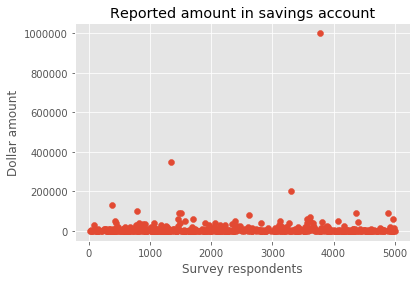

In [73]:
#examining current value of savings account - looks like there's some outliers
y = fin_mil['q055']
x = fin_mil['dummy_id']
plt.title("Reported amount in savings account")
plt.ylabel("Dollar amount")
plt.xlabel("Survey respondents")
plt.scatter(x,y)

In [74]:
# in order to get better descriptives of the data, drop values 2 standard deviations above and below the mean. Create a new
#dataframe to make sure we can use it all later
target = fin_mil['q055']
mean = target.mean()
sd = target.std()
fin_mil_save = fin_mil[(target > mean - 2*sd) & (target < mean + 2*sd)]
fin_mil_save['q055'].describe()

count       553.000000
mean       7399.578662
std       13996.768382
min           1.000000
25%         200.000000
50%        2000.000000
75%        8600.000000
max      100000.000000
Name: q055, dtype: float64

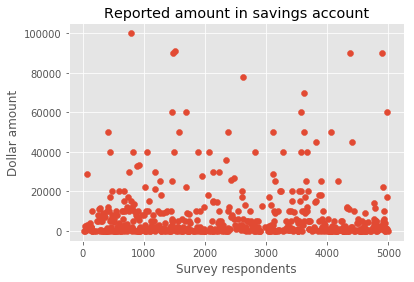

In [75]:
#scatterplot of value of savings account without outliers
matplotlib.style.use('ggplot')

y = fin_mil_save['q055']
x = fin_mil_save['dummy_id']
plt.title("Reported amount in savings account")
plt.ylabel("Dollar amount")
plt.xlabel("Survey respondents")
plt.scatter(x,y)
plt.savefig("Images & Resources/Amount in savings account.png", dpi=300, bbox_inches = "tight")
plt.show()

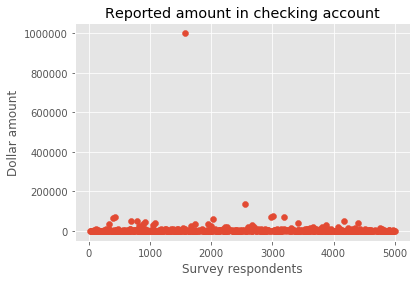

In [76]:
#examining current value of checking account - looks like there's some outliers
y = fin_mil['q054']
x = fin_mil['dummy_id']
plt.title("Reported amount in checking account")
plt.ylabel("Dollar amount")
plt.xlabel("Survey respondents")
plt.scatter(x,y)

In [77]:
# in order to get better descriptives of the data, drop values 2 standard deviations above and below the mean
target = fin_mil['q054']
mean = target.mean()
sd = target.std()
fin_mil_check = fin_mil[(target > mean - 2*sd) & (target < mean + 2*sd)]
fin_mil_check['q054'].describe()

count      671.000000
mean      3790.046200
std       8891.202693
min          1.000000
25%        200.000000
50%       1000.000000
75%       3500.000000
max      76000.000000
Name: q054, dtype: float64

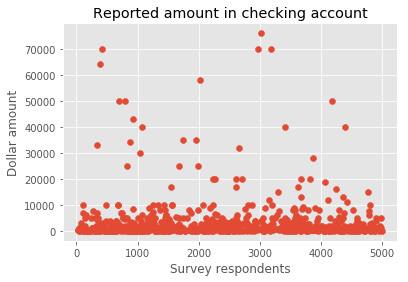

In [78]:
#scatterplot of value of checking account without outliers
matplotlib.style.use('ggplot')
y = fin_mil_check['q054']
x = fin_mil_check['dummy_id']
plt.title("Reported amount in checking account")
plt.ylabel("Dollar amount")
plt.xlabel("Survey respondents")
plt.scatter(x,y)
plt.savefig("Images & Resources/Amount in checking account.png", dpi=300, bbox_inches = "tight")
plt.show()

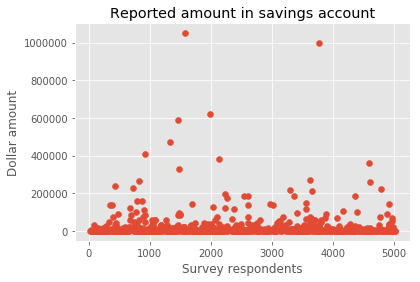

In [79]:
# examining current value of total savings - looks like there's some outliers
y = fin_mil['total_savings']
x = fin_mil['dummy_id']
plt.title("Reported amount in savings account")
plt.ylabel("Dollar amount")
plt.xlabel("Survey respondents")
plt.scatter(x,y)

In [96]:
# in order to get better descriptives of the data, drop values 2 standard deviations above and below the mean
target = fin_mil['total_savings']
mean = target.mean()
sd = target.std()
fin_mil_total = fin_mil[(target > mean - 2*sd) & (target < mean + 2*sd)]
fin_mil_total['total_savings'].describe()

count       767.000000
mean      12564.878748
std       25948.167425
min           0.000000
25%         100.000000
50%        2200.000000
75%       11000.000000
max      173000.000000
Name: total_savings, dtype: float64

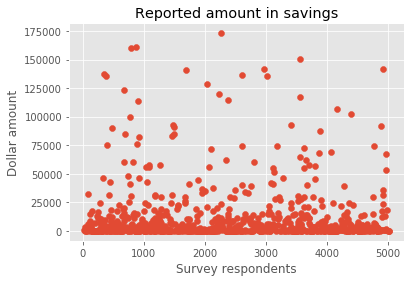

In [81]:
#scatterplot of value of total savings without outliers
matplotlib.style.use('ggplot')
y = fin_mil_total['total_savings']
x = fin_mil_total['dummy_id']
plt.title("Reported amount in savings")
plt.ylabel("Dollar amount")
plt.xlabel("Survey respondents")
plt.scatter(x,y)
plt.savefig("Images & Resources/savings overall.png", dpi=300, bbox_inches = "tight")
plt.show()

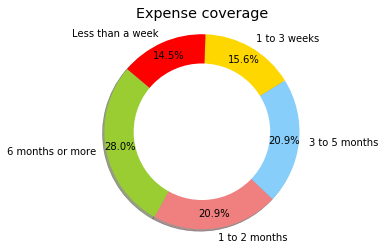

In [82]:
#pie chart of q044 - how long millenials think they can cover expenses
#create a dataframe and drop null responses
expenses = fin_mil.dropna(axis=0, subset=['q044'])
colors = ["yellowgreen","lightcoral","lightskyblue","gold","red"]
labels = ['6 months or more','1 to 2 months','3 to 5 months', '1 to 3 weeks','Less than a week']
plt.pie(expenses.q044.value_counts(), labels = labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140,pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)
plt.axis("equal")
plt.title("Expense coverage")
plt.savefig("Images & Resources/Expense coverage.png", dpi=300, bbox_inches = "tight")
plt.show()

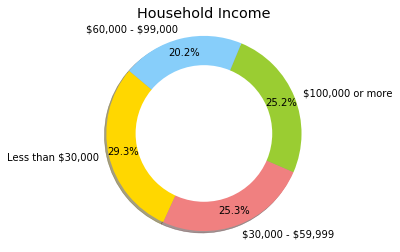

In [83]:
#pie chart of income_cat - what income categoeries are millenials in?
#create a dataframe and drop null responses
income = fin_mil.dropna(axis=0, subset=['income_cat'])

colors = ["gold","lightcoral","yellowgreen","lightskyblue"]
labels = ["Less than $30,000","\$30,000 - $59,999","$100,000 or more","\$60,000 - $99,000"]
plt.pie(income.income_cat.value_counts(), labels = labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140,pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)
plt.axis("equal")
plt.title("Household Income")
plt.savefig("Images & Resources/Household income.png", dpi=300, bbox_inches = "tight")
plt.show()

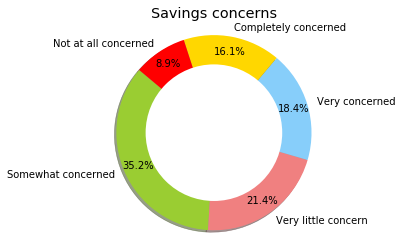

In [84]:
#pie chart of q009 - how concerned millenials are about how much money they have
#create a dataframe and drop null responses
financial_concerns = fin_mil.dropna(axis=0, subset=['q009'])
colors = ["yellowgreen","lightcoral","lightskyblue","gold","red"]
labels = ['Somewhat concerned','Very little concern','Very concerned','Completely concerned', 'Not at all concerned']
plt.pie(financial_concerns.q009.value_counts(), labels = labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140,pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)
plt.axis("equal")
plt.title("Savings concerns")
plt.savefig("Images & Resources/Savings concerns.png", dpi=300, bbox_inches = "tight")
plt.show()

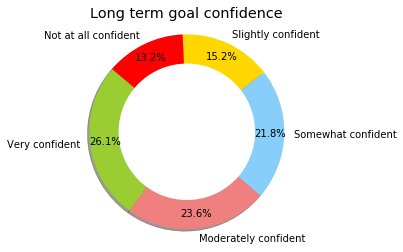

In [85]:
#pie chart of q045 - how confident millenials are that they are doing what they need to meet long term goals
#create a dataframe and drop null responses
LTG_confidence = fin_mil.dropna(axis=0, subset=['q045'])
colors = ["yellowgreen","lightcoral","lightskyblue","gold","red"]
labels = ['Very confident','Moderately confident','Somewhat confident', 'Slightly confident','Not at all confident']
plt.pie(LTG_confidence.q045.value_counts(), labels = labels, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140,pctdistance=0.85)
centre_circle = plt.Circle((0,0),0.70,fc='white')
plt.gca().add_artist(centre_circle)
plt.axis("equal")
plt.title("Long term goal confidence")
plt.savefig("Images & Resources/Long term goal confidence.png", dpi=300, bbox_inches = "tight")
plt.show()

In [86]:
#regression to analyze the relationship between how much money one has in total savings vs. how confident they are they're meeting their long term goals
totalsavings_LTGconfidence = ols('total_savings ~ C(q045)', data=fin_mil_total).fit()
totalsavings_LTGconfidence.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_savings   R-squared:                       0.096
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     20.27
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           7.02e-16
Time:                        07:23:11   Log-Likelihood:                -8833.5
No. Observations:                 766   AIC:                         1.768e+04
Df Residuals:                     761   BIC:                         1.770e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept       2.035e+04   2525.474      8.059      0.000    1.54e+04    2.53e+04
C(q045)[T.2.0]  3410.5456   3136.445      1.087      0.277   -2746.566    9567.657
C(q045)[T.3.0] -1.112e+04   3067.435     -3.626      0.000   -1.71e+04   -5101.582
C(q045)[T.4.0] -9813.2078   3394.601     -2.891      0.004   -1.65e+04   -3149.314
C(q045)[T.5.0] -1.827e+04   3152.435     -5.795      0.000   -2.45e+04   -1.21e+04
==============================================================================
Omnibus:                      540.571   Durbin-Watson:                   1.897
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6088.676
Skew:                           3.188   Prob(JB):                         0.00
Kurtosis:                      15.252   Cond. No.                         7.26
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [87]:
#pearson correlation to examine the relationship between total savings and age
slope, intercept, r_value, p_value, std_err = stats.linregress(fin_mil_total["total_savings"], fin_mil_total["age"])
print("slope: %f    intercept: %f" % (slope, intercept))
print("r-squared: %f" % r_value**2)

slope: 0.000006    intercept: 30.696933
r-squared: 0.002947


In [88]:
#regression to analyze the relationship between how much money one has in total savings and their educational background
#NB for this, went back and changed dummy codes for educational groups, so that reference group was people with a bachelor's degree
totalsavings_LTGconfidence = ols('hhincome ~ C(ed_group)', data=fin_mil_total).fit()
totalsavings_LTGconfidence.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               hhincome   R-squared:                       0.271
Model:                            OLS   Adj. R-squared:                  0.268
Method:                 Least Squares   F-statistic:                     70.87
Date:                Fri, 26 Apr 2019   Prob (F-statistic):           4.96e-51
Time:                        07:23:16   Log-Likelihood:                -2091.8
No. Observations:                 766   AIC:                             4194.
Df Residuals:                     761   BIC:                             4217.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             12.8654      0.258     49.808      0.000      12.358      13.372
C(ed_group)[T.2.0]    -6.8654      0.602    -11.411      0.000      -8.046      -5.684
C(ed_group)[T.3.0]    -4.9341      0.416    -11.875      0.000      -5.750      -4.118
C(ed_group)[T.4.0]    -2.6987      0.342     -7.890      0.000      -3.370      -2.027
C(ed_group)[T.5.0]     0.6731      0.447      1.504      0.133      -0.205       1.551
==============================================================================
Omnibus:                       63.837   Durbin-Watson:                   2.056
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.813
Skew:                          -0.756   Prob(JB):                     1.27e-17
Kurtosis:                       3.391   Cond. No.                         5.69
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

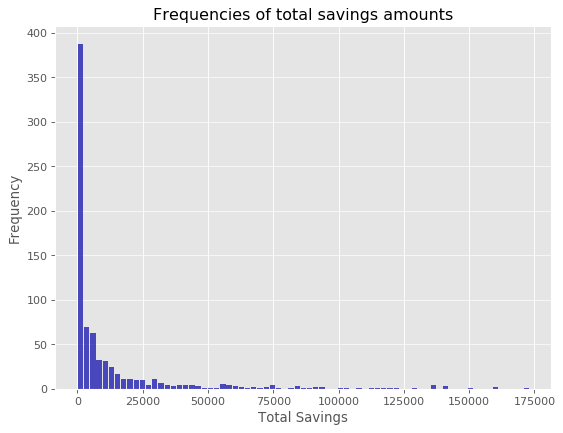

In [25]:
#Total savings frequencies
from matplotlib.pyplot import figure
plt.figure(num=None,figsize=(8,6),dpi=80,facecolor='w',edgecolor='k')
n, bins, patches = plt.hist(x=fin_mil_total["total_savings"], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Total Savings')
plt.ylabel('Frequency')
plt.title('Frequencies of total savings amounts')
maxfreq = n.max()
plt.savefig("Images & Resources/totalsavings_freq.png", dpi=300, bbox_inches = "tight")
plt.show()


In [26]:
#Labor status
laborstatus = fin_mil.dropna(axis=0, subset=['laborstatus'])
laborstatus['laborstatus'].value_counts()


1.0    596
7.0     68
4.0     67
8.0     29
6.0     18
3.0      5
2.0      3
5.0      1
Name: laborstatus, dtype: int64

In [27]:
#distribution across wage groups
wages = fin_mil.dropna(axis=0, subset=['q009'])
wages['q009'].value_counts()

3.0    277
4.0    169
2.0    145
1.0    127
5.0     70
Name: q009, dtype: int64

In [28]:
#employer-provided retirement accounts
retirement_emp = fin_mil.dropna(axis=0, subset=['q048'])
retirement_emp['q048'].value_counts()

1.0    457
2.0    278
3.0     52
Name: q048, dtype: int64

In [29]:
#individual retirement accounts
retirement_ind = fin_mil.dropna(axis=0, subset=['q049'])
retirement_ind['q049'].value_counts()

2.0    533
1.0    182
3.0     68
Name: q049, dtype: int64

In [30]:
#Personal savings or investments
other_value_sources = fin_mil.dropna(axis=0, subset=['q051'])
other_value_sources['q051'].value_counts()

2.0    525
1.0    195
3.0     67
Name: q051, dtype: int64

In [31]:
#emergency savings
emergency = fin_mil.dropna(axis=0, subset=['q117a'])
emergency['q117a'].value_counts()

2.0    422
1.0    311
3.0     55
Name: q117a, dtype: int64

In [94]:
#regression to analyze the relationship between total savings one has, and race & ethnicity. 
totalsavings_LTGconfidence = ols('total_savings ~ C(racethn5)', data=fin_mil_total).fit()
totalsavings_LTGconfidence.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          total_savings   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.017
Method:                 Least Squares   F-statistic:                     4.351
Date:                Fri, 26 Apr 2019   Prob (F-statistic):            0.00174
Time:                        08:07:50   Log-Likelihood:                -8852.4
No. Observations:                 765   AIC:                         1.771e+04
Df Residuals:                     760   BIC:                         1.774e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept           1.398e+04   1190.266     11.749      0.000    1.16e+04    1.63e+04
C(racethn5)[T.2.0] -1.036e+04   3431.704     -3.018      0.003   -1.71e+04   -3620.402
C(racethn5)[T.3.0] -4878.7400   2341.882     -2.083      0.038   -9476.065    -281.415
C(racethn5)[T.4.0]  6104.2715   4193.832      1.456      0.146   -2128.599    1.43e+04
C(racethn5)[T.5.0]  5048.9082   4927.462      1.025      0.306   -4624.144    1.47e+04
==============================================================================
Omnibus:                      554.007   Durbin-Watson:                   1.870
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             6198.776
Skew:                           3.315   Prob(JB):                         0.00
Kurtosis:                      15.269   Cond. No.                         5.56
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""